<a href="https://colab.research.google.com/github/anurag3345/SentimentAnalysis/blob/master/sentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers torch  pandas
!pip install scikit-learn



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 107.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 83.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 60.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 59.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [ ]:
import pandas as pd

df = pd.read_csv('goemotions_1.csv')

print(df.head())


                                                text       id  \
0                                    That game hurt.  eew5j0j   
1   >sexuality shouldn’t be a grouping category I...  eemcysk   
2     You do right, if you don't care then fuck 'em!  ed2mah1   
3                                 Man I love reddit.  eeibobj   
4  [NAME] was nowhere near them, he was by the Fa...  eda6yn6   

                author            subreddit    link_id   parent_id  \
0                Brdd9                  nrl  t3_ajis4z  t1_eew18eq   
1          TheGreen888     unpopularopinion  t3_ai4q37   t3_ai4q37   
2             Labalool          confessions  t3_abru74  t1_ed2m7g7   
3        MrsRobertshaw             facepalm  t3_ahulml   t3_ahulml   
4  American_Fascist713  starwarsspeculation  t3_ackt2f  t1_eda65q2   

    created_utc  rater_id  example_very_unclear  admiration  ...  love  \
0  1.548381e+09         1                 False           0  ...     0   
1  1.548084e+09        37               

In [ ]:

df.columns


Index(['text', 'id', 'author', 'subreddit', 'link_id', 'parent_id',
       'created_utc', 'rater_id', 'example_very_unclear', 'admiration',
       'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion',
       'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust',
       'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy',
       'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief',
       'remorse', 'sadness', 'surprise', 'neutral'],
      dtype='object')

In [ ]:
# Get the list of all emotion labels (excluding metadata columns)
emotion_labels = df.columns[9:]  # Emotions start from the 10th column

# Print a sample row with labels
print(df[emotion_labels].sum(axis=1).value_counts())  # Check how many labels per row


1    56984
2    10291
3     1404
0     1129
4      137
5       29
6       14
7        8
9        2
8        2
Name: count, dtype: int64


In [ ]:
# Keep only the text and emotion label columns
df = df[['text'] + list(emotion_labels)]


In [ ]:
df.head()

,text,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,That game hurt.,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,>sexuality shouldn’t be a grouping category I...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"You do right, if you don't care then fuck 'em!",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Man I love reddit.,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,"[NAME] was nowhere near them, he was by the Fa...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
# Drop rows where example_very_unclear is True (if it exists in your dataset)
if "example_very_unclear" in df.columns:
    df = df[df["example_very_unclear"] == False]


In [ ]:
df.head()

,text,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,That game hurt.,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,>sexuality shouldn’t be a grouping category I...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"You do right, if you don't care then fuck 'em!",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Man I love reddit.,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,"[NAME] was nowhere near them, he was by the Fa...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
df = df[df[emotion_labels].sum(axis=1) > 0]


In [ ]:
texts = df['text'].values
labels = df[emotion_labels].values

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(texts, labels, test_size=0.2, random_state=42)


print(f"Training size: {len(X_train)}")
print(f"Validation size: {len(X_val)}")


Training size: 55096
Validation size: 13775


In [ ]:
import torch
import torch.nn as nn

criterion = nn.BCEWithLogitsLoss()


In [ ]:
import torch

logits = torch.tensor([[0.2, -1.5, 3.0, 0.5, -0.3, 2.1, -0.8]])


probabilities = torch.sigmoid(logits)

print(probabilities)


tensor([[0.5498, 0.1824, 0.9526, 0.6225, 0.4256, 0.8909, 0.3100]])


In [ ]:
predictions = (probabilities > 0.5).int()

print(predictions)


tensor([[1, 0, 1, 1, 0, 1, 0]], dtype=torch.int32)


In [ ]:
from sklearn.metrics import precision_recall_fscore_support, hamming_loss

y_true = y_val
y_pred = (torch.sigmoid(torch.tensor(y_val)) > 0.5).int()

precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='macro')

hamming = hamming_loss(y_true, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"Hamming Loss: {hamming}")


Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Hamming Loss: 0.0


In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification
import torch


tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=28)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
train_encodings = tokenizer(list(X_train), truncation=True, padding=True, max_length=128)
val_encodings = tokenizer(list(X_val), truncation=True, padding=True, max_length=128)

train_labels = torch.tensor(y_train)
val_labels = torch.tensor(y_val)


In [ ]:
from torch.utils.data import DataLoader, TensorDataset

train_dataset = TensorDataset(torch.tensor(train_encodings['input_ids']),
                               torch.tensor(train_encodings['attention_mask']),
                               train_labels)

val_dataset = TensorDataset(torch.tensor(val_encodings['input_ids']),
                             torch.tensor(val_encodings['attention_mask']),
                             val_labels)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)


In [ ]:
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

optimizer = optim.AdamW(model.parameters(), lr=5e-5)
scheduler = StepLR(optimizer, step_size=3, gamma=0.1)


In [ ]:
# Define the device (GPU or CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)  # Make sure the model is on the right device

# Initialize lists to store metrics for plotting later
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

In [ ]:
from torch.nn import BCEWithLogitsLoss

# Initialize BCEWithLogitsLoss
loss_fn = BCEWithLogitsLoss()

# Training loop with tqdm
for epoch in range(epochs):
    model.train()  # Set model to training mode
    total_loss = 0
    correct_preds = 0
    total_preds = 0

    # Wrap the training loader with tqdm for progress bar
    for batch in tqdm(train_loader, desc=f"Training Epoch {epoch+1}", ncols=100):
        # Move batch tensors to the device (GPU/CPU)
        input_ids, attention_mask, labels = [item.to(device) for item in batch]

        optimizer.zero_grad()

        # Forward pass
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits

        # Calculate loss using BCEWithLogitsLoss
        loss = loss_fn(logits, labels.float())  # Ensure labels are of type float

        # Backward pass
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

        # Calculate predictions
        predictions = (torch.sigmoid(logits) > 0.5).int()
        correct_preds += (predictions == labels).sum().item()
        total_preds += labels.numel()

    # Calculate and store training metrics
    train_loss = total_loss / len(train_loader)
    train_accuracy = correct_preds / total_preds
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    print(f"Epoch {epoch+1} - Loss: {train_loss} - Accuracy: {train_accuracy}")

    # Validation loop with tqdm
    model.eval()  # Set model to evaluation mode
    val_loss = 0
    correct_preds = 0
    total_preds = 0

    with torch.no_grad():
        # Wrap the validation loader with tqdm for progress bar
        for batch in tqdm(val_loader, desc=f"Validation Epoch {epoch+1}", ncols=100):
            # Move batch tensors to the device (GPU/CPU)
            input_ids, attention_mask, labels = [item.to(device) for item in batch]
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            logits = outputs.logits

            # Calculate loss using BCEWithLogitsLoss
            val_loss += loss_fn(logits, labels.float()).item()

            # Calculate predictions
            predictions = (torch.sigmoid(logits) > 0.5).int()
            correct_preds += (predictions == labels).sum().item()
            total_preds += labels.numel()

    # Calculate and store validation metrics
    val_accuracy = correct_preds / total_preds
    val_losses.append(val_loss / len(val_loader))
    val_accuracies.append(val_accuracy)

    print(f"Epoch {epoch+1} - Validation Loss: {val_loss / len(val_loader)} - Validation Accuracy: {val_accuracy}")

    # Update the learning rate
    scheduler.step()

# Now that we've stored the metrics, we can plot them later


Training Epoch 1:   0%|                                                    | 0/3444 [00:00<?, ?it/s]

Epoch 1 - Loss: 0.13387279340761532 - Accuracy: 0.9586941753614471


Validation Epoch 1:   0%|                                                   | 0/861 [00:00<?, ?it/s]

Epoch 1 - Validation Loss: 0.11963489580722082 - Validation Accuracy: 0.9605366865439461


Training Epoch 2:   0%|                                                    | 0/3444 [00:00<?, ?it/s]

Epoch 2 - Loss: 0.11262554997355438 - Accuracy: 0.961933326764712


Validation Epoch 2:   0%|                                                   | 0/861 [00:00<?, ?it/s]

Epoch 2 - Validation Loss: 0.11813252123286914 - Validation Accuracy: 0.9603370495203526


In [ ]:
# List of emotion labels corresponding to the 28 emotions
emotion_labels = [
    'admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring',
    'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust',
    'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy',
    'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse',
    'sadness', 'surprise', 'neutral'
]


In [ ]:
# Function to predict labels for new input text
def predict_text(input_text):
    # Preprocess the input text (tokenize, pad, and convert to tensor)
    inputs = tokenizer(input_text, padding=True, truncation=True, max_length=512, return_tensors="pt")

    # Move the tensors to the correct device (GPU or CPU)
    input_ids = inputs['input_ids'].to(device)
    attention_mask = inputs['attention_mask'].to(device)

    # Get predictions from the model
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits

    # Apply sigmoid to get probabilities (output probabilities for each label)
    probs = torch.sigmoid(logits).squeeze()  # Remove extra dimensions if batch size = 1

    # Get the predicted labels (thresholded at 0.5)
    predicted_labels = (probs > 0.4).int()

    # Map the predicted label indices to emotions
    predicted_emotions = [emotion_labels[i] for i in range(len(predicted_labels)) if predicted_labels[i] == 1]

    return predicted_emotions, probs

# Test the function with a sample text input
input_texts = [
    "I'm so excited for the upcoming concert!",
    "This movie was really disappointing.",
    "I can't believe I won the lottery! What a surprise!",
    "I'm feeling so proud of my achievements today.",
    "I hate when people lie to me.",
    "This is the best day ever, I'm so happy!",
    "I'm worried about the upcoming exam.",
    "My heart is broken after hearing the sad news.",
    "I feel so grateful for everything I have.",
    "I don't understand why they are being so rude.",
    "I'm feeling a little nervous about meeting new people.",
    "She was so sweet to help me with the project.",
    "I'm extremely angry at how things turned out.",
    "I’m so relieved that the test is finally over.",
    "I can't wait to see my friends this weekend!",
    "I feel so confused about the situation.",
    "That was such a beautiful moment, it made me tear up.",
    "I can't stop thinking about what happened last night.",
    "It's amazing how supportive everyone has been.",
    "I’m devastated by the loss of my pet."
]
for text in input_texts:
    predicted_emotions, probs = predict_text(text)
    print(f"Input Text: {text}")
    print(f"Predicted Emotions: {predicted_emotions}")
    print(f"Prediction Probabilities: {probs}\n")

print("Predicted Emotions:", predicted_emotions)
print("Prediction Probabilities:", probs)


Input Text: I'm so excited for the upcoming concert!
Predicted Emotions: ['excitement']
Prediction Probabilities: tensor([6.1740e-02, 1.3249e-02, 9.1563e-03, 8.8913e-03, 2.8352e-02, 1.0869e-02,
        5.0930e-03, 1.5659e-02, 1.2632e-02, 3.8477e-03, 2.5136e-03, 1.2284e-03,
        1.1907e-03, 7.4366e-01, 3.9865e-03, 2.0614e-02, 1.8527e-03, 1.5012e-01,
        2.1269e-02, 5.0220e-03, 3.7302e-02, 8.4477e-03, 8.7911e-03, 5.4205e-03,
        6.9896e-04, 4.2970e-03, 3.9247e-02, 1.3899e-01], device='cuda:0')

Input Text: This movie was really disappointing.
Predicted Emotions: ['disappointment']
Prediction Probabilities: tensor([0.0734, 0.0096, 0.0070, 0.0424, 0.0144, 0.0023, 0.0057, 0.0024, 0.0019,
        0.5066, 0.0253, 0.0152, 0.0390, 0.0205, 0.0066, 0.0049, 0.0099, 0.0202,
        0.0049, 0.0088, 0.0125, 0.0066, 0.0540, 0.0023, 0.0206, 0.2306, 0.0301,
        0.1016], device='cuda:0')

Input Text: I can't believe I won the lottery! What a surprise!
Predicted Emotions: ['surprise']
Predi

In [ ]:
# Save the model and tokenizer
model.save_pretrained("/content/your_model")
tokenizer.save_pretrained("/content/your_model")


('/content/your_model/tokenizer_config.json',
 '/content/your_model/special_tokens_map.json',
 '/content/your_model/vocab.txt',
 '/content/your_model/added_tokens.json')

In [ ]:
import shutil

# Create a zip file from the saved model and tokenizer
shutil.make_archive("/content/your_model", 'zip', "/content/your_model")


'/content/your_model.zip'

In [ ]:
from google.colab import files

# Trigger the download of the zipped file
files.download("/content/your_model.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
model_path = "/content/your_model"
model = BertForSequenceClassification.from_pretrained(model_path)
tokenizer = BertTokenizer.from_pretrained(model_path)

In [ ]:
from transformers import BertForSequenceClassification, BertTokenizer
import torch

# Load the model and tokenizer from the directory
model_path = "/content/your_model"  # or the local path where you saved it
model = BertForSequenceClassification.from_pretrained(model_path)
tokenizer = BertTokenizer.from_pretrained(model_path)

# List of input texts for prediction
texts = [
    "I'm so excited for the upcoming concert!",
    "This movie was really disappointing.",
    "I can't believe I won the lottery! What a surprise!",
    "I'm feeling so proud of my achievements today.",
    "I hate when people lie to me.",
    "This is the best day ever, I'm so happy!",
    "I'm worried about the upcoming exam.",
    "My heart is broken after hearing the sad news.",
    "I feel so grateful for everything I have.",
    "I don't understand why they are being so rude.",
    "I'm feeling a little nervous about meeting new people.",
    "She was so sweet to help me with the project.",
    "I'm extremely angry at how things turned out.",
    "I’m so relieved that the test is finally over.",
    "I can't wait to see my friends this weekend!",
    "I feel so confused about the situation.",
    "That was such a beautiful moment, it made me tear up.",
    "I can't stop thinking about what happened last night.",
    "It's amazing how supportive everyone has been.",
    "I’m devastated by the loss of my pet."
]

# Emotion labels (adjust to match your model's labels)
emotion_labels = [
    'admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring',
    'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust',
    'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy',
    'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse',
    'sadness', 'surprise', 'neutral'
]


# Tokenize the list of texts
inputs = tokenizer(texts, padding=True, truncation=True, return_tensors="pt")

# Make predictions
with torch.no_grad():
    outputs = model(**inputs)
    logits = outputs.logits

# Convert logits to probabilities
softmax = torch.nn.Softmax(dim=1)
probabilities = softmax(logits)

# Get predicted labels
predicted_labels = []
for prob in probabilities:
    # Get the index of the maximum probability
    predicted_index = torch.argmax(prob).item()
    predicted_label = emotion_labels[predicted_index]
    predicted_labels.append(predicted_label)

# Print the predictions (emotions)
for text, label in zip(texts, predicted_labels):
    print(f"Text: {text}\nPredicted Emotion: {label}\n")


Text: I'm so excited for the upcoming concert!
Predicted Emotion: excitement

Text: This movie was really disappointing.
Predicted Emotion: disappointment

Text: I can't believe I won the lottery! What a surprise!
Predicted Emotion: surprise

Text: I'm feeling so proud of my achievements today.
Predicted Emotion: admiration

Text: I hate when people lie to me.
Predicted Emotion: anger

Text: This is the best day ever, I'm so happy!
Predicted Emotion: joy

Text: I'm worried about the upcoming exam.
Predicted Emotion: fear

Text: My heart is broken after hearing the sad news.
Predicted Emotion: sadness

Text: I feel so grateful for everything I have.
Predicted Emotion: gratitude

Text: I don't understand why they are being so rude.
Predicted Emotion: confusion

Text: I'm feeling a little nervous about meeting new people.
Predicted Emotion: excitement

Text: She was so sweet to help me with the project.
Predicted Emotion: admiration

Text: I'm extremely angry at how things turned out.
Pre

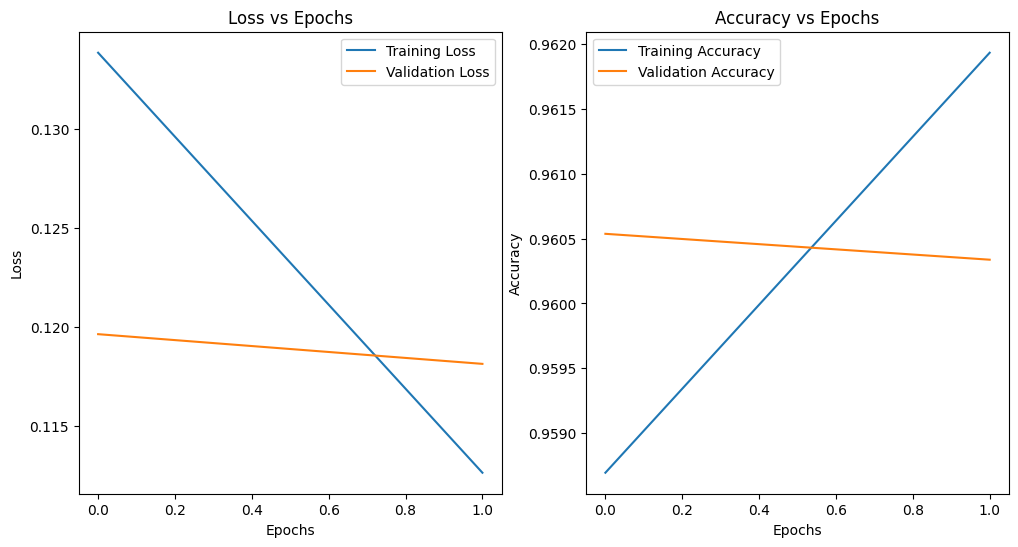

In [ ]:
# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(epochs), train_losses, label='Training Loss')
plt.plot(range(epochs), val_losses, label='Validation Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(epochs), train_accuracies, label='Training Accuracy')
plt.plot(range(epochs), val_accuracies, label='Validation Accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [ ]:
import torch
import pickle
from transformers import BertForSequenceClassification, BertTokenizer

# Load the model and tokenizer from the directory
model_path = "/content/your_model"  # or the local path where you saved it
model = BertForSequenceClassification.from_pretrained(model_path)
tokenizer = BertTokenizer.from_pretrained(model_path)

# Save the model as a pickle file
with open("/content/your_model.pkl", "wb") as f:
    pickle.dump(model, f)

# Save the tokenizer as well
with open("/content/your_tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)

print("Model and tokenizer saved as .pkl files.")


Model and tokenizer saved as .pkl files.


In [ ]:
from google.colab import files

# Save the files to the Colab environment (if not already saved)
model_path = '/content/your_model.pkl'
tokenizer_path = '/content/your_tokenizer.pkl'

# Download the .pkl files
files.download(model_path)
files.download(tokenizer_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>